In [1]:
import os 
import pandas as pd
import numpy as np
os.getcwd()



'/Users/gavin/Desktop/marketing analytics/finaal_AB testing'

In [2]:
os.chdir('/Users/gavin/Desktop/marketing analytics/final_customer_churn model')

In [3]:
df = pd.read_csv('subscribers.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  117178 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       189698 non-null  float64
 7   num_ideal_streaming_services  115458 non-null  float64
 8   age                           192459 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  117178 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       189698 non-null  float64
 7   num_ideal_streaming_services  115458 non-null  float64
 8   age                           192459 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

In [6]:
#new customer churn
#churn 1: people who do not pay after trial payment period=0, trial completed=True
#not churn 0:people who pay for at least 1 period after trial payment completed. payment period >0,trial completed=True
df["churn"] = np.where(df["trial_completed"], np.where(df["payment_period"] == 0, 1, np.where(df["payment_period"] > 0, 0, "none")), "none")
df

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True,0
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,0
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True,0
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True,0
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True,0
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True,0


In [7]:
df = df[df["churn"] != "none"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200236 entries, 0 to 227626
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    200236 non-null  int64  
 1   subid                         200236 non-null  int64  
 2   package_type                  172581 non-null  object 
 3   num_weekly_services_utilized  102610 non-null  float64
 4   preferred_genre               171975 non-null  object 
 5   intended_use                  197279 non-null  object 
 6   weekly_consumption_hour       165645 non-null  float64
 7   num_ideal_streaming_services  101171 non-null  float64
 8   age                           167990 non-null  float64
 9   male_TF                       199990 non-null  object 
 10  country                       200236 non-null  object 
 11  attribution_technical         200236 non-null  object 
 12  attribution_survey            197988 non-nul

In [8]:
df=df.drop(['current_sub_TF','payment_period','trial_completed','plan_type','Unnamed: 0','language','country','payment_type','account_creation_date','trial_end_date','last_payment','next_payment','cancel_date'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200236 entries, 0 to 227626
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         200236 non-null  int64  
 1   package_type                  172581 non-null  object 
 2   num_weekly_services_utilized  102610 non-null  float64
 3   preferred_genre               171975 non-null  object 
 4   intended_use                  197279 non-null  object 
 5   weekly_consumption_hour       165645 non-null  float64
 6   num_ideal_streaming_services  101171 non-null  float64
 7   age                           167990 non-null  float64
 8   male_TF                       199990 non-null  object 
 9   attribution_technical         200236 non-null  object 
 10  attribution_survey            197988 non-null  object 
 11  op_sys                        188829 non-null  object 
 12  months_per_bill_period        200236 non-nul

In [10]:
df.drop(df[df.join_fee < 0].index, inplace=True)
df.drop(df[df.age>100].index,inplace=True)
df.dropna(inplace=True)

In [11]:
df=pd.get_dummies(df, columns=['package_type','male_TF',
                                 'preferred_genre','intended_use',
                                 'attribution_technical','attribution_survey','op_sys','num_weekly_services_utilized','num_ideal_streaming_services',
                            ],drop_first=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82943 entries, 2 to 227624
Data columns (total 87 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   subid                                          82943 non-null  int64  
 1   weekly_consumption_hour                        82943 non-null  float64
 2   age                                            82943 non-null  float64
 3   months_per_bill_period                         82943 non-null  int64  
 4   monthly_price                                  82943 non-null  float64
 5   discount_price                                 82943 non-null  float64
 6   initial_credit_card_declined                   82943 non-null  bool   
 7   join_fee                                       82943 non-null  float64
 8   num_trial_days                                 82943 non-null  int64  
 9   churn                                          82

In [13]:
# Import train_test_split
from sklearn.model_selection import train_test_split
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.8402925692239682


In [43]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

In [44]:
# Print the confusion matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[16537  1188]
 [ 2786  4372]]


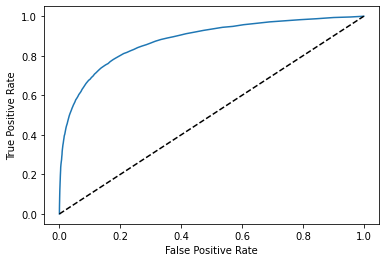

In [45]:
#ROC
import matplotlib.pyplot as plt
y_pred_prob = clf.predict_proba(X_test)[:, 1]
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob,pos_label='1')

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [46]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.8790950778144411


In [51]:
y_pred_prob_train = clf.predict_proba(X_train)[:, 1]

In [54]:
df2=pd.DataFrame(y_pred_prob_train).T

In [55]:
df2.to_csv('/Users/gavin/Desktop/marketing analytics/final_customer_churn model/churn.csv',sep=",",index=True,header=True)